# iFood Dev Week

Saiba mais sobre essa semana incrível no Artigo [Desvendando a iFood Dev Week](https://www.dio.me/articles/desvendando-a-ifood-dev-week).

## Dia 1: Conheça o Google Colab e o Projeto Desta Dev Week

Vamos mergulhar no Google Colab, aprendendo como ele pode ser usado para automatizar tarefas cotidianas, principalmente através da manipulação de planilhas. Além disso, você aprenderá na prática o conceito do Net Promoter Score (NPS), uma métrica fundamental para entender a satisfação do cliente.

In [1]:
# Importando Dados e Bibliotecas

import pandas as pd

dados = pd.read_csv('feedbacks.csv', delimiter=';')

dados.head()

,nota,comentario
0,10,"Excelente Bootcamp, estou muito satisfeita!"
1,9,"Bootcamp top, mas com mentorias de IA o tornar..."
2,6,Um Bootcamp razoávelm torcendo para o próximo ...
3,10,"Bootcamp incrível, continuem potencializando a..."
4,7,"O Bootcamp foi ok, nada de especial."


In [3]:
# TODO: Implementar a lógica de NPS em comandos simples e sequenciais.
#       Código Versão 1 (Paradigma Imperativo).

detratores = 0
promotores = 0

notas = dados['nota']

for nota in notas:
  if nota >= 9:
    promotores += 1
  elif nota <= 6:
    detratores += 1

nps = (promotores - detratores) / len(notas) * 100
print(nps)

40.0


In [2]:
# TODO: Evoluir a implementação para separar melhor as responsabilidades.
#       Código Versão 2 (Paradigma Funcional).

def calcular_nps(notas):
  detratores = notas.apply(lambda nota: nota <= 6).sum()
  promotores = notas[notas >= 9].count()

  return (promotores - detratores) / len(notas) * 100

notas = dados['nota']

nps = calcular_nps(notas)

print(nps)

40.0


In [6]:
# TODO: Abstrair o problema com classes, transformando os dados em objetos de negócico.
#       Código Versão 3 (Paradigma Orientado a Objetos).

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    detratores = sum([1 for feedback in self.feedbacks if feedback.nota <= 6])
    promotores = sum([1 for feedback in self.feedbacks if feedback.nota >= 9])

    return (promotores - detratores) / len(self.feedbacks) * 100


feedbacks = [Feedback(linha['nota'], linha['comentario'])  for i, linha in dados.iterrows()]

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()

print(nps)

40.0


## Dia 2: Desvendando o Poder dos Seus Dados com Python

No segundo dia, vamos conectar nosso Google Colab ao Google Drive, extrair dados do NPS e aplicar as técnicas de ETL (Extração, Transformação e Carregamento) nesses dados. Com a ajuda da biblioteca matplotlib, criaremos gráficos para visualizar e compreender o nível de satisfação dos nossos usuários.

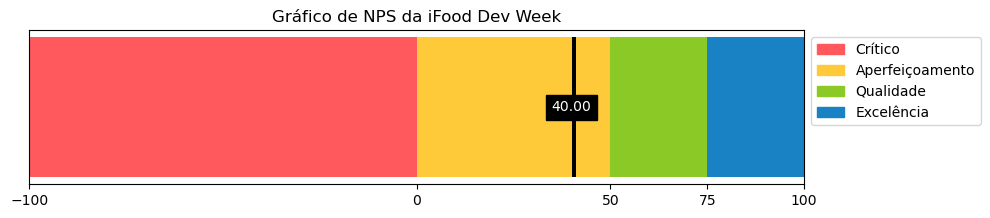

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS
NPS_ZONAS =   ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES =   ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

# TODO: Criar um gráfico usando "matplotlib" para visualizar o NPS que calculamos no Dia 1!
def criar_grafico_nps(nps):
  fig, ax = plt.subplots(figsize=(10, 2))

  for i, zona in enumerate(NPS_ZONAS):
    ax.barh([0], width=NPS_VALORES[i+1]-NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

  ax.barh([0], width=1, left=nps, color='black')
  ax.set_yticks([])
  ax.set_xlim(-100, 100)
  ax.set_xticks(NPS_VALORES)

  plt.text(nps, 0, f'{nps:.2f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

  patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
  plt.legend(handles=patches, bbox_to_anchor=(1,1))

  plt.title('Gráfico de NPS da iFood Dev Week')

  plt.show()

criar_grafico_nps(nps)

## Dia 3: Decifrando Sentimentos com Inteligência Artificial (IA)

No último dia, vamos utilizar as técnicas de Processamento de Linguagem Natural (PLN) para analisar os sentimentos expressos nos comentários associados às notas de NPS. Dessa forma, teremos uma perspectiva qualitativa que complementa nossos dados quantitativos.